In [3]:
import torch
import btbench_config

# Make sure the config ROOT_DIR is set correctly
print("Expected braintreebank data at:", btbench_config.ROOT_DIR)
print("Sampling rate:", btbench_config.SAMPLING_RATE, "Hz")

Expected braintreebank data at: /om2/user/zaho/braintreebank/braintreebank
Sampling rate: 2048 Hz


## The BrainTreebankSubject Class

In [4]:
from braintreebank_subject import BrainTreebankSubject

subject_id = 3

# use cache=True to load this trial's neural data into RAM, if you have enough memory!
# It will make the loading process faster.
subject = BrainTreebankSubject(subject_id, allow_corrupted=False, cache=True, dtype=torch.float32)
print("Electrode labels:", subject.electrode_labels) # list of electrode labels

# Optionally, subset the electrodes to a specific set of electrodes.
#subject.set_electrode_subset(['F3aOFa2', 'F3aOFa3', 'F3aOFa4', 'F3aOFa7']) # if you change this line when using cache=True, you need to clear the cache after: subject.clear_neural_data_cache()
print("Electrode labels after subsetting:", subject.electrode_labels)

Electrode labels: ['F2Ia1', 'F2Ia2', 'F2Ia3', 'F2Ia4', 'F2Ia5', 'F2Ia6', 'F2Ia7', 'F2Ia8', 'F2Ia9', 'F2Ia10', 'F2Ia11', 'F2Ia12', 'F2Ia13', 'F2Ia14', 'F3c1', 'F3c2', 'F3c3', 'F3c4', 'F3c5', 'F3c6', 'F3c8', 'F3c9', 'F3c10', 'F3b1', 'F3b2', 'F3b3', 'F3b4', 'F3b7', 'F3b8', 'F3aOF1', 'F3aOF2', 'F3aOF3', 'F3aOF4', 'F3aOF5', 'F3aOF6', 'F3aOF7', 'F3aOF8', 'F3d1', 'F3d2', 'F3d3', 'F3d4', 'F3d5', 'F3d6', 'F3d7', 'F3d8', 'F3d9', 'F3d10', 'T1aIc1', 'T1aIc2', 'T1aIc3', 'T1aIc4', 'T1aIc5', 'T1aIc6', 'P2a1', 'P2a2', 'P2a3', 'P2a4', 'P2a5', 'P2a6', 'P2a7', 'P2a8', 'P2a9', 'P2a10', 'T1b1', 'T1b2', 'T1b3', 'T1b4', 'T1b5', 'T1b6', 'T1cIe1', 'T1cIe2', 'T1cIe5', 'T1cIe6', 'T1cIe7', 'T1cIe8', 'T1cIe9', 'T1cIe10', 'T1cIe11', 'T1cIe12', 'P2b1', 'P2b3', 'P2b4', 'P2b5', 'P2b6', 'P2b7', 'P2b8', 'P2b9', 'P2b10', 'P2b11', 'P2b12', 'P2b13', 'P2b14', 'P2b15', 'P2b16', 'O1aIb1', 'O1aIb2', 'O1aIb3', 'O1aIb4', 'O1aIb5', 'O1aIb6', 'O1aIb7', 'O1aIb8', 'O1aIb9', 'O1aIb10', 'O1aIb11', 'O1aIb12', 'O1aIb13', 'O1aIb14', 'O1a

Loading the electrode data and electrode coordinates

In [5]:
trial_id = 0

subject.load_neural_data(trial_id)
window_from = None
window_to = None # if None, the whole trial will be loaded

print("All neural data shape:")
print(subject.get_all_electrode_data(trial_id, window_from=window_from, window_to=window_to).shape) # (n_electrodes, n_samples). To get the data for a specific electrode, use subject.get_electrode_data(trial_id, electrode_label)

print("\nElectrode coordinates:")
print(subject.get_electrode_coordinates()) # L, P, I coordinates of the electrodes

All neural data shape:
torch.Size([124, 14017056])

Electrode coordinates:
tensor([[150.,  98., 129.],
        [150.,  96., 126.],
        [150.,  93., 122.],
        [150.,  91., 118.],
        [151.,  88., 114.],
        [151.,  86., 111.],
        [152.,  84., 107.],
        [153.,  82., 104.],
        [155.,  78., 100.],
        [154.,  77.,  96.],
        [153.,  75.,  91.],
        [155.,  72.,  89.],
        [155.,  70.,  85.],
        [155.,  68.,  81.],
        [153.,  95.,  92.],
        [155.,  94.,  92.],
        [159.,  93.,  93.],
        [162.,  92.,  93.],
        [165.,  92.,  93.],
        [169.,  90.,  93.],
        [176.,  88.,  92.],
        [179.,  87.,  92.],
        [181.,  86.,  92.],
        [155.,  79., 108.],
        [157.,  79., 109.],
        [160.,  79., 108.],
        [163.,  81., 108.],
        [173.,  82., 106.],
        [177.,  83., 106.],
        [146.,  81., 120.],
        [149.,  82., 121.],
        [153.,  85., 121.],
        [156.,  82., 121.],
 

## The BrainTreebankSubjectTrialBenchmarkDataset Class

In [6]:
from btbench_datasets import BrainTreebankSubjectTrialBenchmarkDataset

# Options for eval_name (from the BTBench paper):
#   frame_brightness, global_flow, local_flow, global_flow_angle, local_flow_angle, face_num, volume, pitch, delta_volume, 
#   delta_pitch, speech, onset, gpt2_surprisal, word_length, word_gap, word_index, word_head_pos, word_part_speech, speaker
eval_name = "word_part_speech"

# if True, the dataset will output the indices of the samples in the neural data in a tuple: (index_from, index_to); 
# if False, the dataset will output the neural data directly
output_indices = False

start_neural_data_before_word_onset = 0 # the number of samples to start the neural data before each word onset
end_neural_data_after_word_onset = btbench_config.SAMPLING_RATE * 1 # the number of samples to end the neural data after each word onset -- here we use 1 second


dataset = BrainTreebankSubjectTrialBenchmarkDataset(subject, trial_id, dtype=torch.float32, eval_name=eval_name, output_indices=output_indices, 
                                                    start_neural_data_before_word_onset=start_neural_data_before_word_onset, end_neural_data_after_word_onset=end_neural_data_after_word_onset)

print("Items in the dataset:", len(dataset), "\n")
print("The first item:", dataset[0][0], f"label = {dataset[0][1]}", sep="\n")

Items in the dataset: 6272 

The first item:
tensor([[-33.2303, -34.2937, -38.0155,  ...,  -7.9753,  -8.5070,  -6.3802],
        [-76.0310, -75.7652, -74.9676,  ..., -51.0418, -51.5735, -52.9027],
        [-43.3324, -45.7249, -46.5225,  ..., -30.8378, -30.3061, -30.3061],
        ...,
        [ 39.3447,  35.8888,  29.7744,  ..., 159.5056, 158.1764, 160.8348],
        [ 98.0959,  98.3618,  96.7667,  ...,  39.6106,  35.0912,  36.1546],
        [-13.5580, -12.7604, -13.0263,  ...,  43.0665,  41.4715,  44.6616]])
label = 0


## Train/Test Splits

In this example, we generate 5 train/test splits for the Single Subject Single Movie (SS-SM) evaluation.

All options: generate_splits_SS_SM, generate_splits_SS_DM, generate_splits_DS_DM, generate_splits_DS_SM

In [7]:
import btbench_train_test_splits

# train_datasets and test_datasets are arrays of length k_folds, each element is a BrainTreebankSubjectTrialBenchmarkDataset for the train/test split
train_datasets, test_datasets = btbench_train_test_splits.generate_splits_SS_SM(subject, trial_id, eval_name, add_other_trials=False, k_folds=5, dtype=torch.float32, 
                                                                                # Put the dataset parameters here
                                                                                output_indices=output_indices, start_neural_data_before_word_onset=start_neural_data_before_word_onset, end_neural_data_after_word_onset=end_neural_data_after_word_onset)
print("len(train_datasets) = len(test_datasets) = k_folds =", len(train_datasets))

len(train_datasets) = len(test_datasets) = k_folds = 5


## Simple Logistic Regression on Raw Voltage

Fold 1 of 5


	 Data conversion time: 14.921s
	 Data standardization time: 38.489s
	 Model training time: 495.520s
	 Evaluation time: 11.419s
	 Train accuracy: 0.998 | Test accuracy: 0.324
	 Total fold time: 560.349s



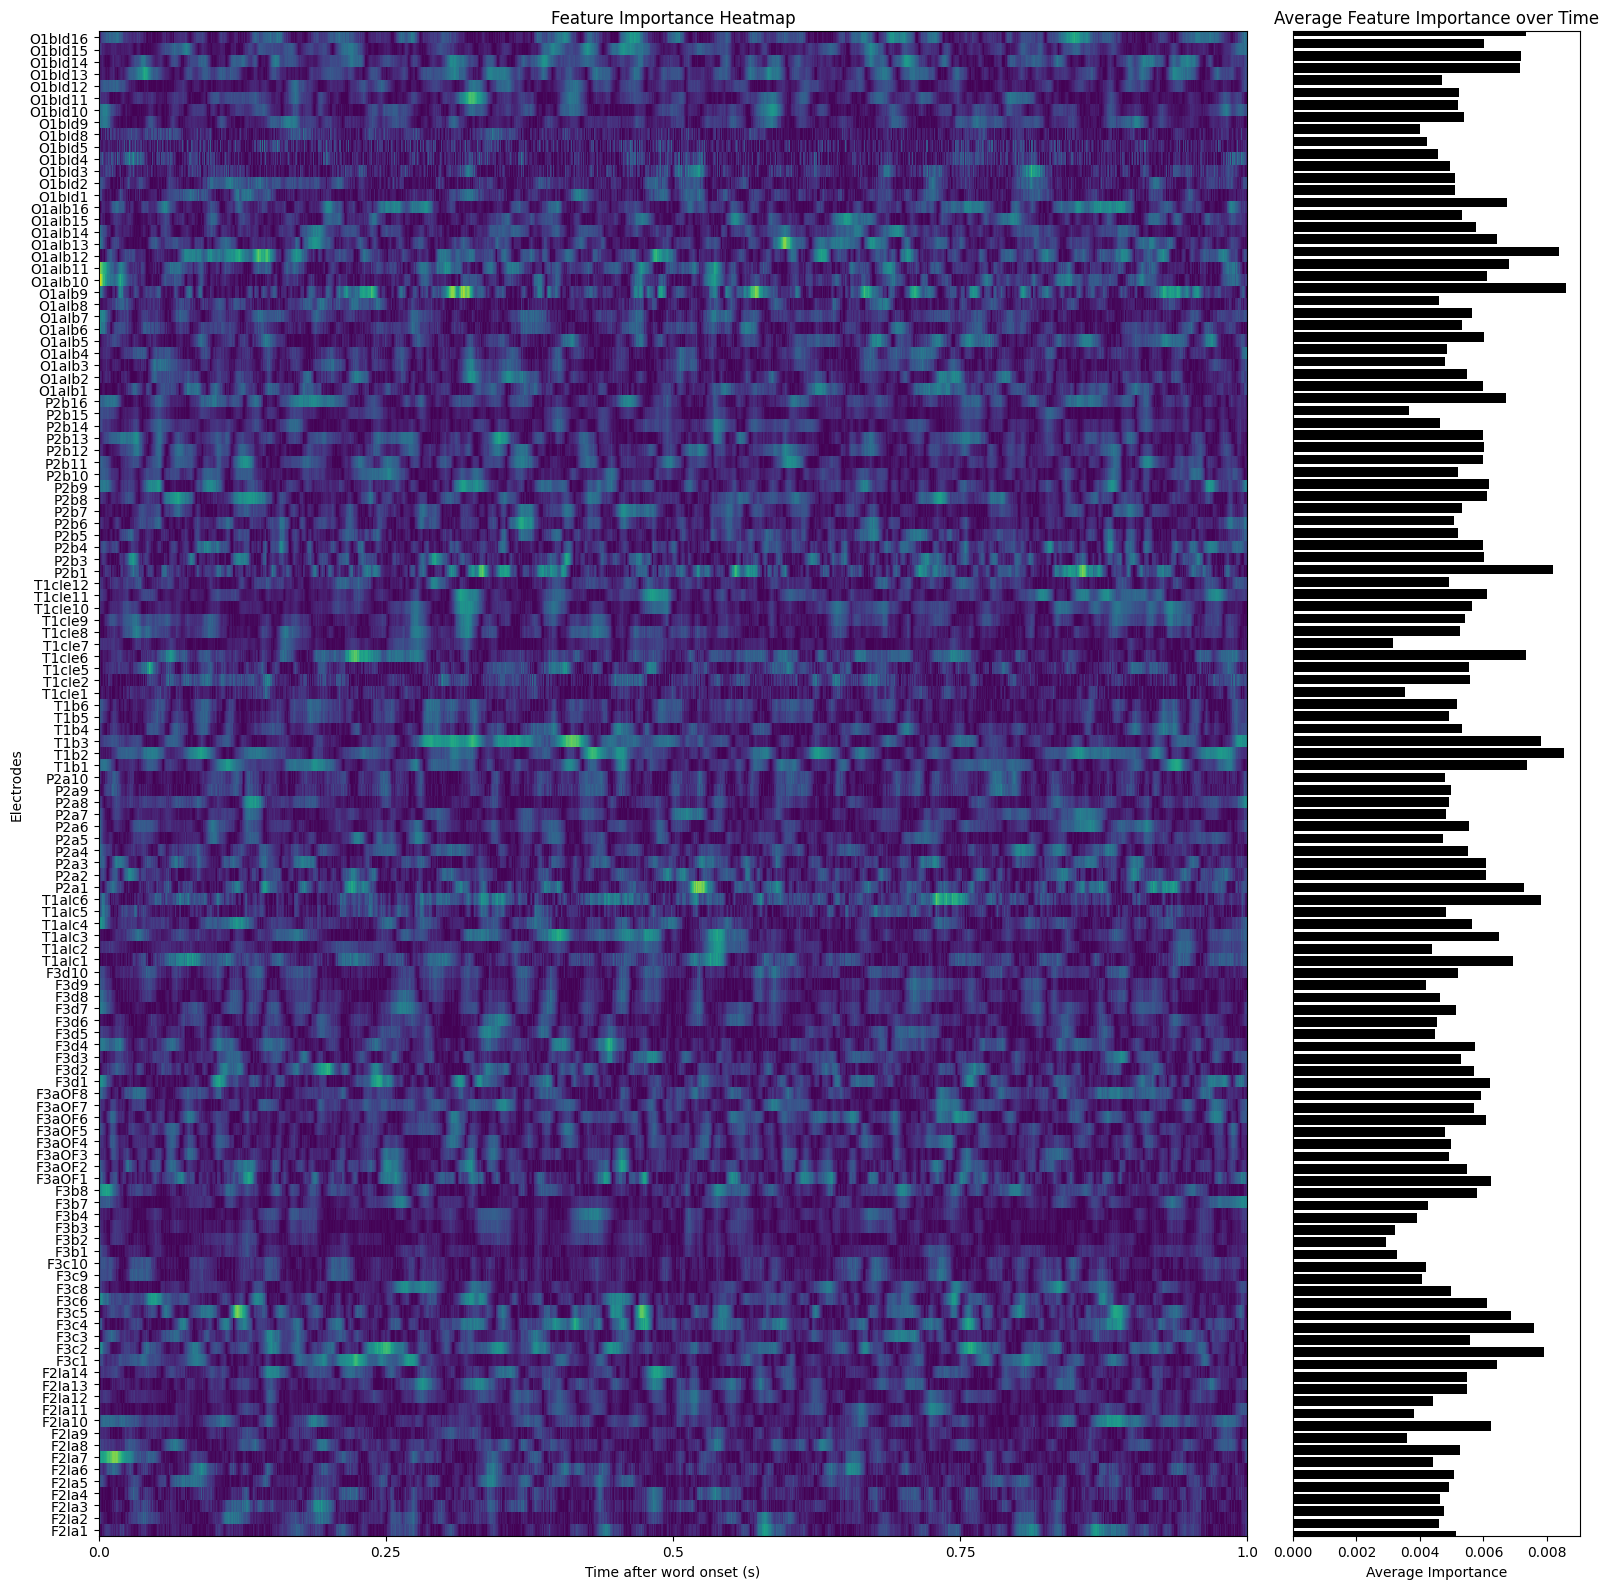

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

standardize_data = True

for fold_idx in [0]: #range(len(train_datasets)):
    print(f"Fold {fold_idx+1} of {len(train_datasets)}")
    train_dataset = train_datasets[fold_idx]
    test_dataset = test_datasets[fold_idx]

    # Convert PyTorch dataset to numpy arrays for scikit-learn
    start_time = time.time()
    X_train = np.array([item[0].flatten() for item in train_dataset])
    y_train = np.array([item[1] for item in train_dataset])
    X_test = np.array([item[0].flatten() for item in test_dataset])
    y_test = np.array([item[1] for item in test_dataset])
    conversion_time = time.time() - start_time
    print(f"\t Data conversion time: {conversion_time:.3f}s")

    # Standardize the data
    scaling_time = 0
    if standardize_data:
        start_time = time.time()
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        scaling_time = time.time() - start_time
        print(f"\t Data standardization time: {scaling_time:.3f}s")

    # Train logistic regression
    start_time = time.time()
    clf = LogisticRegression(random_state=42, max_iter=1000, tol=1e-3)
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"\t Model training time: {training_time:.3f}s")

    # Evaluate model
    start_time = time.time()
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    eval_time = time.time() - start_time
    print(f"\t Evaluation time: {eval_time:.3f}s")
    print(f"\t Train accuracy: {train_score:.3f} | Test accuracy: {test_score:.3f}")
    print(f"\t Total fold time: {conversion_time + scaling_time + training_time + eval_time:.3f}s\n")

# Get feature importances from logistic regression coefficients
importances = np.abs(clf.coef_[0])  # Take absolute values since sign just indicates direction

# Reshape back to original dimensions
n_electrodes = dataset[0][0].shape[0]  # Assuming 64 electrodes, adjust if different
n_samples = len(importances) // n_electrodes
importance_map = importances.reshape(n_electrodes, n_samples)

# Create heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 16), gridspec_kw={'width_ratios': [4, 1]})

# Plot heatmap on the left
ax1.imshow(importance_map, cmap='viridis', aspect='auto', interpolation='none')
ax1.set_yticks(range(len(subject.electrode_labels)))
ax1.set_yticklabels(subject.electrode_labels)
ax1.set_title('Feature Importance Heatmap')
ax1.set_xlabel('Time after word onset (s)')
ax1.set_ylabel('Electrodes')

n_ticks = 5
ticks = np.linspace(0, importance_map.shape[1], n_ticks, endpoint=True)
ax1.set_xticks(ticks, labels=ticks/btbench_config.SAMPLING_RATE, rotation=0)

# Plot horizontal bars on the right
y_pos = np.arange(len(importance_map))
ax2.barh(y_pos, np.abs(importance_map).mean(axis=1), color="black")
ax2.set_yticks(y_pos)
ax2.set_yticklabels(subject.electrode_labels)
ax2.set_title('Average Feature Importance over Time')
ax2.set_xlabel('Average Importance')
ax2.set_ylim(min(y_pos), max(y_pos))
ax2.set_yticks([])

# Align the plots vertically
ax1.set_ylim(ax1.get_ylim()[::-1])  # Invert y-axis to match heatmap orientation
plt.tight_layout()
plt.show()


## Logistic Regression on Spectrogram

In [19]:
from scipy import signal
def compute_spectrogram(data, fs=2048, max_freq=20000):
    """Compute spectrogram for a single trial of data.
    
    Args:
        data (numpy.ndarray): Input voltage data of shape (n_channels, n_samples) or (batch_size, n_channels, n_samples)
        fs (int): Sampling frequency in Hz
    
    Returns:
        numpy.ndarray: Spectrogram representation
    """
    # For 1 second of data at 2048Hz, we'll use larger window
    nperseg = 256  # 125 ms window
    nperseg //= 4
    noverlap = nperseg // 4 * 3 #75% overlap
    #noverlap = 0 # no overlap
    
    f, t, Sxx = signal.spectrogram(
        data, 
        fs=fs,
        nperseg=nperseg,
        noverlap=noverlap,
        window='boxcar'
    )
    
    return np.log10(Sxx[:, (f<max_freq) & (f>=0)] + 1e-10)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

standardize_data = True

for fold_idx in [0]: #range(len(train_datasets)):
    print(f"Fold {fold_idx+1} of {len(train_datasets)}")
    train_dataset = train_datasets[fold_idx]
    test_dataset = test_datasets[fold_idx]

    # Convert PyTorch dataset to numpy arrays for scikit-learn
    start_time = time.time()
    X_train = np.array([compute_spectrogram(item[0]).flatten() for item in train_dataset])
    y_train = np.array([item[1] for item in train_dataset])
    X_test = np.array([compute_spectrogram(item[0]).flatten() for item in test_dataset])
    y_test = np.array([item[1] for item in test_dataset])
    conversion_time = time.time() - start_time
    print(f"\t Data conversion time: {conversion_time:.3f}s")

    # Standardize the data
    scaling_time = 0
    if standardize_data:
        start_time = time.time()
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        scaling_time = time.time() - start_time
        print(f"\t Data standardization time: {scaling_time:.3f}s")

    # Train logistic regression
    start_time = time.time()
    clf = LogisticRegression(random_state=42, max_iter=1000, tol=1e-3)
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"\t Model training time: {training_time:.3f}s")

    # Evaluate model
    start_time = time.time()
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    eval_time = time.time() - start_time
    print(f"\t Evaluation time: {eval_time:.3f}s")
    print(f"\t Train accuracy: {train_score:.3f} | Test accuracy: {test_score:.3f}")
    print(f"\t Total fold time: {conversion_time + scaling_time + training_time + eval_time:.3f}s\n")

Fold 1 of 5


	 Data conversion time: 248.555s
	 Data standardization time: 73.471s
	 Model training time: 308.316s
	 Evaluation time: 23.399s
	 Train accuracy: 0.998 | Test accuracy: 0.259
	 Total fold time: 653.742s



In [21]:
# Get feature importances from logistic regression jcoefficients
importances = np.abs(clf.coef_[0])  # Take absolute values since sign just indicates direction

# Reshape back to original dimensions
n_electrodes = dataset[0][0].shape[0]  # Assuming 64 electrodes, adjust if different
n_samples = len(importances) // n_electrodes
n_frequencies = 129
n_timebins = n_samples // n_frequencies
importance_map = importances.reshape(n_electrodes, n_frequencies, n_timebins)
importance_map = importance_map.mean(axis=1)

# Create heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 16), gridspec_kw={'width_ratios': [4, 1]})

# Plot heatmap on the left
ax1.imshow(importance_map, cmap='viridis', aspect='auto', interpolation='none')
ax1.set_yticks(range(len(subject.electrode_labels)))
ax1.set_yticklabels(subject.electrode_labels)
ax1.set_title('Feature Importance Heatmap')
ax1.set_xlabel('Time after word onset (s)')
ax1.set_ylabel('Electrodes')

n_ticks = 5
ticks = np.linspace(0, importance_map.shape[1], n_ticks, endpoint=True)
tickabels = np.linspace(-start_neural_data_before_word_onset/btbench_config.SAMPLING_RATE, end_neural_data_after_word_onset/btbench_config.SAMPLING_RATE, n_ticks, endpoint=True)
ax1.set_xticks(ticks, labels=tickabels, rotation=0)

# Plot horizontal bars on the right
y_pos = np.arange(len(importance_map))
ax2.barh(y_pos, np.abs(importance_map).mean(axis=1), color="black")
ax2.set_yticks(y_pos)
ax2.set_yticklabels(subject.electrode_labels)
ax2.set_title('Average Feature Importance over Time')
ax2.set_xlabel('Average Importance')
ax2.set_ylim(min(y_pos), max(y_pos))
ax2.set_yticks([])

# Align the plots vertically
ax1.set_ylim(ax1.get_ylim()[::-1])  # Invert y-axis to match heatmap orientation
plt.tight_layout()
plt.show()


ValueError: cannot reshape array of size 511500 into shape (124,129,31)

## Give Spectrogram + Phase

In [20]:
from scipy import signal
import numpy as np
def compute_stft(data, fs=2048, max_freq=20000, absangle=True):
    """Compute spectrogram with both power and phase information for a single trial of data.
    
    Args:
        data (numpy.ndarray): Input voltage data of shape (n_channels, n_samples) or (batch_size, n_channels, n_samples)
        fs (int): Sampling frequency in Hz
        max_freq (int): Maximum frequency to include in Hz
    
    Returns:
        numpy.ndarray: Real-valued spectrogram representation containing both magnitude and phase information
                      Shape: (..., 2, n_freqs, n_times) where the 2 represents [magnitude, phase]
    """
    # For 1 second of data at 2048Hz, we'll use larger window
    nperseg = 256  # 125 ms window
    #nperseg //= 2
    noverlap = nperseg // 4 * 3 # 75% overlap
    noverlap = 0
    
    # Use STFT to get complex-valued coefficients
    f, t, Zxx = signal.stft(
        data,
        fs=fs, 
        nperseg=nperseg,
        noverlap=noverlap,
        window='boxcar'
    )
    
    # Get frequencies mask
    freq_mask = (f < max_freq) & (f >= 0)
    Zxx = Zxx[:, freq_mask, :]

    if absangle:
        # Split complex values into magnitude and phase
        magnitude = np.abs(Zxx)
        phase = np.angle(Zxx)
        # Stack magnitude and phase along a new axis
        return np.stack([magnitude, phase], axis=-2)
    else:
        real = np.real(Zxx)
        imag = np.imag(Zxx)
        return np.stack([real, imag], axis=-2)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

standardize_data = True

absangle = False

for fold_idx in [0]: #range(len(train_datasets)):
    print(f"Fold {fold_idx+1} of {len(train_datasets)}")
    train_dataset = train_datasets[fold_idx]
    test_dataset = test_datasets[fold_idx]

    # Convert PyTorch dataset to numpy arrays for scikit-learn
    start_time = time.time()
    X_train = np.array([compute_stft(item[0], absangle=absangle).flatten() for item in train_dataset])
    y_train = np.array([item[1] for item in train_dataset])
    X_test = np.array([compute_stft(item[0], absangle=absangle).flatten() for item in test_dataset])
    y_test = np.array([item[1] for item in test_dataset])
    conversion_time = time.time() - start_time
    print(f"\t Data conversion time: {conversion_time:.3f}s")

    # Standardize the data
    scaling_time = 0
    if standardize_data:
        start_time = time.time()
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        scaling_time = time.time() - start_time
        print(f"\t Data standardization time: {scaling_time:.3f}s")

    # Train logistic regression
    start_time = time.time()
    clf = LogisticRegression(random_state=42, max_iter=1000, tol=1e-3)
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"\t Model training time: {training_time:.3f}s")

    # Evaluate model
    start_time = time.time()
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    eval_time = time.time() - start_time
    print(f"\t Evaluation time: {eval_time:.3f}s")
    print(f"\t Train accuracy: {train_score:.3f} | Test accuracy: {test_score:.3f}")
    print(f"\t Total fold time: {conversion_time + scaling_time + training_time + eval_time:.3f}s\n")

Fold 1 of 5


	 Data conversion time: 96.478s
	 Data standardization time: 46.880s
	 Model training time: 203.604s
	 Evaluation time: 13.447s
	 Train accuracy: 0.998 | Test accuracy: 0.314
	 Total fold time: 360.408s

